<a href="https://colab.research.google.com/github/Vish1203/Thyroid-disease---Classification/blob/main/Thyroid_Classification_UCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import sklearn



In [ ]:
columns = ["Age", "Sex", "On Thyroxine", "Query on Thyroxine", 
           "On Antithyroid Medication", "Sick", "Pregnant", 
           "Thyroid Surgery", "I131 Treatment", "Query Hypothyroid", 
           "Query Hyperthyroid", "Lithium", "Goitre", "Tumor", 
           "Hypopituitary", "Psych", "TSH Measured", "TSH", "T3 Measured", 
           "T3", "TT4 Measured", "TT4", "T4U Measured", "T4U", 
           "FTI Measured", "FTI", "TBG Measured", "TBG", "Referral Source", "Category"]

In [ ]:
hyper_data = pd.read_csv("allhyper.csv", names=columns)
hypo_data = pd.read_csv("allhypo.csv", names=columns)
sick_data = pd.read_csv("sick.csv", names=columns)

In [ ]:
def parse_row(row):
    row = row.split(".")[0]
    return row

def to_hyperthyroid(row):
    if row != "negative":
        row = "hyperthyroid"
    return row

def to_hypothyroid(row):
    if row != "negative":
        row = "hypothyroid"
    return row

def convert_category(dataframe, column):
    
    if column == 'Sex':
        conditionF = dataframe[column] == 'F' # For sex column
        conditionT = dataframe[column] == 'M' # For sex column
    else:
        conditionF = dataframe[column] == 'f'
        conditionT = dataframe[column] == 't'
    
    dataframe.loc[conditionF, column] = 0
    dataframe.loc[conditionT, column] = 1

In [ ]:
hyper_data['Category'] = hyper_data['Category'] \
                            .apply(parse_row) \
                            .apply(to_hyperthyroid)

hypo_data['Category'] = hypo_data['Category'] \
                            .apply(parse_row) \
                            .apply(to_hypothyroid)

sick_data['Category'] = sick_data['Category'] \
                            .apply(parse_row)

In [ ]:

# Combined Thyroid Data
thyroid_data = [hyper_data, hypo_data, sick_data]
full_data = pd.concat(thyroid_data) \
                 .drop_duplicates() \
                 .drop(['Referral Source', 'TBG', 'TBG Measured'], axis=1)

In [ ]:
classes = full_data['Category'].unique()
classes

array(['negative', 'hyperthyroid', 'hypothyroid', 'sick'], dtype=object)

In [ ]:
full_data.duplicated().sum()

0

In [ ]:
full_data.isnull().sum()

Age                          0
Sex                          0
On Thyroxine                 0
Query on Thyroxine           0
On Antithyroid Medication    0
Sick                         0
Pregnant                     0
Thyroid Surgery              0
I131 Treatment               0
Query Hypothyroid            0
Query Hyperthyroid           0
Lithium                      0
Goitre                       0
Tumor                        0
Hypopituitary                0
Psych                        0
TSH Measured                 0
TSH                          0
T3 Measured                  0
T3                           0
TT4 Measured                 0
TT4                          0
T4U Measured                 0
T4U                          0
FTI Measured                 0
FTI                          0
Category                     0
dtype: int64

In [ ]:
full_data.shape


(3221, 27)

In [ ]:
full_data.head

<bound method NDFrame.head of      Age Sex On Thyroxine Query on Thyroxine  ...   T4U FTI Measured  FTI  Category
0     41   F            f                  f  ...  1.14            t  109  negative
1     23   F            f                  f  ...     ?            f    ?  negative
2     46   M            f                  f  ...  0.91            t  120  negative
3     70   F            t                  f  ...     ?            f    ?  negative
4     70   F            f                  f  ...  0.87            t   70  negative
...   ..  ..          ...                ...  ...   ...          ...  ...       ...
2774  82   M            f                  f  ...  0.77            t   88      sick
2776  79   M            f                  f  ...  0.85            t  137      sick
2782  50   F            f                  f  ...   0.8            t  122      sick
2786  73   ?            f                  f  ...     1            t  173      sick
2796  73   M            f                  t  

In [ ]:
full_data['Age'].value_counts()

59    91
70    83
60    82
63    79
73    79
      ..
6      1
?      1
5      1
4      1
10     1
Name: Age, Length: 94, dtype: int64

In [ ]:
binary_cols = ['On Thyroxine', 'Query on Thyroxine', 'Sex',
               'On Antithyroid Medication', 'Sick', 'Pregnant', 
               'Thyroid Surgery', 'I131 Treatment', 'Query Hypothyroid', 
               'Query Hyperthyroid', 'Lithium', 'Goitre', 'Tumor', 
               'Hypopituitary', 'Psych', 'TSH Measured', 'T3 Measured', 
               'TT4 Measured', 'T4U Measured', 'FTI Measured']

for col in binary_cols: convert_category(full_data, col)

In [ ]:
for col in full_data.columns: 
    if col != 'Category':
        full_data.loc[full_data[col] == '?', col] = np.nan
        full_data[col] = pd.to_numeric(full_data[col])

In [ ]:
full_data.isna().sum()

Age                            1
Sex                          127
On Thyroxine                   0
Query on Thyroxine             0
On Antithyroid Medication      0
Sick                           0
Pregnant                       0
Thyroid Surgery                0
I131 Treatment                 0
Query Hypothyroid              0
Query Hyperthyroid             0
Lithium                        0
Goitre                         0
Tumor                          0
Hypopituitary                  0
Psych                          0
TSH Measured                   0
TSH                          247
T3 Measured                    0
T3                           589
TT4 Measured                   0
TT4                          142
T4U Measured                   0
T4U                          276
FTI Measured                   0
FTI                          274
Category                       0
dtype: int64

In [ ]:
full_data.dropna(axis=0, thresh=20, inplace=True)

In [ ]:
full_data.isna().sum()

Age                            1
Sex                          127
On Thyroxine                   0
Query on Thyroxine             0
On Antithyroid Medication      0
Sick                           0
Pregnant                       0
Thyroid Surgery                0
I131 Treatment                 0
Query Hypothyroid              0
Query Hyperthyroid             0
Lithium                        0
Goitre                         0
Tumor                          0
Hypopituitary                  0
Psych                          0
TSH Measured                   0
TSH                          247
T3 Measured                    0
T3                           589
TT4 Measured                   0
TT4                          142
T4U Measured                   0
T4U                          276
FTI Measured                   0
FTI                          274
Category                       0
dtype: int64

In [ ]:
full_data.corr()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,Query Hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH Measured,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI
Age,1.000000,-0.003208,-0.008367,-0.027613,-0.060207,0.083034,-0.116033,-0.039668,0.042425,0.016482,-0.034982,-0.036091,-0.035829,-0.035816,-0.038576,-0.073710,0.092744,-0.076631,0.077409,-0.251273,0.059131,-0.060948,0.088681,-0.189604,0.087605,0.028542
Sex,-0.003208,1.000000,-0.081450,0.037623,-0.027244,0.010154,-0.083087,-0.042861,-0.031486,-0.022117,-0.077522,-0.029968,0.032781,-0.076202,0.037187,0.117883,0.006746,-0.043112,0.080917,-0.078818,0.035082,-0.166258,-0.004466,-0.236243,-0.003569,-0.047031
On Thyroxine,-0.008367,-0.081450,1.000000,-0.000926,0.002649,-0.054187,0.009344,0.041605,0.084987,0.067247,-0.003853,0.004240,-0.009662,-0.034566,-0.008605,-0.070955,0.016275,0.018094,-0.169967,0.032834,-0.014113,0.175146,0.005001,0.059515,0.004250,0.135948
Query on Thyroxine,-0.027613,0.037623,-0.000926,1.000000,-0.012891,0.023781,0.028389,0.008892,-0.016360,-0.032564,-0.011204,-0.008690,0.073007,-0.005507,0.202660,-0.026992,-0.128260,-0.015267,-0.041248,-0.026809,0.026413,-0.017155,0.028498,-0.011807,0.028319,-0.012465
On Antithyroid Medication,-0.060207,-0.027244,0.002649,-0.012891,1.000000,-0.022426,0.063103,-0.011901,0.008970,-0.015647,0.094996,-0.007406,-0.009637,-0.017871,-0.002613,-0.023002,-0.003557,-0.016377,0.010847,0.078242,-0.035842,-0.000504,-0.032106,0.064427,-0.032446,-0.038709
Sick,0.083034,0.010154,-0.054187,0.023781,-0.022426,1.000000,-0.025754,-0.024295,-0.028460,0.053747,-0.031120,-0.015118,-0.019672,-0.018166,-0.005333,-0.003470,0.021742,-0.027311,0.034481,-0.105931,-0.005795,-0.043429,0.000444,-0.065227,-0.000030,-0.014251
Pregnant,-0.116033,-0.083087,0.009344,0.028389,0.063103,-0.025754,1.000000,-0.013667,-0.016011,-0.021293,0.118261,-0.008505,-0.011067,0.153192,-0.003000,-0.013918,-0.004647,-0.025788,0.016325,0.176138,0.025849,0.182689,0.036848,0.341664,0.036702,0.007705
Thyroid Surgery,-0.039668,-0.042861,0.041605,0.008892,-0.011901,-0.024295,-0.013667,1.000000,-0.015104,-0.018870,0.015596,-0.008023,-0.010440,-0.002646,-0.002830,-0.024919,0.032723,0.035600,-0.025095,-0.017347,0.024385,-0.028172,-0.004817,0.029365,-0.005085,-0.038799
I131 Treatment,0.042425,-0.031486,0.084987,-0.016360,0.008970,-0.028460,-0.016011,-0.015104,1.000000,0.041584,0.081727,-0.009398,-0.012230,-0.022681,-0.003316,-0.029192,0.038334,0.002754,-0.023103,0.029187,0.028566,-0.010189,0.023749,0.013455,0.023531,-0.019899
Query Hypothyroid,0.016482,-0.022117,0.067247,-0.032564,-0.015647,0.053747,-0.021293,-0.018870,0.041584,1.000000,0.007721,-0.018707,-0.024343,-0.045145,-0.006600,0.007820,0.048008,0.043893,-0.079258,-0.081303,0.007959,-0.042150,-0.017573,0.001297,-0.018220,-0.040930


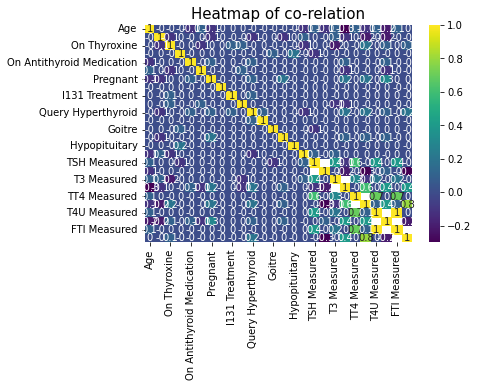

In [ ]:
sns.heatmap(round(full_data.corr(), 1),annot=True,cmap='viridis')
sns.set(rc={'figure.figsize':(20,20)})
plt.title('Heatmap of co-relation',fontsize=15)
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

curr_columns = full_data.columns.difference(['Category'])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_data = imputer.fit_transform(full_data.drop('Category', axis=1))
imputed_data = pd.DataFrame(imputed_data, columns=curr_columns)

full_data = pd.concat([
                    imputed_data.reset_index(), 
                    full_data['Category'].reset_index()], 
                    axis=1).drop('index', axis=1)

In [ ]:
full_data.head()

,Age,FTI,FTI Measured,Goitre,Hypopituitary,I131 Treatment,Lithium,On Antithyroid Medication,On Thyroxine,Pregnant,Psych,Query Hyperthyroid,Query Hypothyroid,Query on Thyroxine,Sex,Sick,T3,T3 Measured,T4U,T4U Measured,TSH,TSH Measured,TT4,TT4 Measured,Thyroid Surgery,Tumor,Category
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.30,1.0,2.5,1.0,125.0,1.0,1.14,1.0,109.0,negative
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.10,1.0,2.0,1.0,102.0,0.0,0.97,0.0,106.0,negative
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.98,0.0,1.9,1.0,109.0,1.0,0.91,1.0,120.0,negative
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.16,1.0,1.9,1.0,175.0,0.0,0.97,0.0,106.0,negative
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.72,1.0,1.2,1.0,61.0,1.0,0.87,1.0,70.0,negative


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler

X = full_data.drop('Category', axis=1)
y = full_data['Category']

col_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

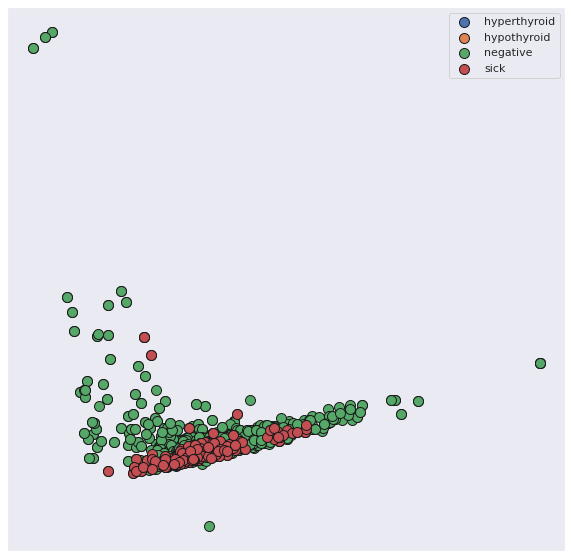

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

def plot_pca_data(X, y):    
    
    LE = LabelEncoder()
    y_encoded = LE.fit_transform(y)
    
    pca = PCA(n_components=2)
    pca.fit(X)
    pca_X = pca.transform(X)

    x_axis = pca_X[:,0]
    y_axis = pca_X[:,1]

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    
    for label in np.unique(y):
        ax.scatter(pca_X[y==label, 0],
                   pca_X[y==label, 1], 
                   label=label,
                   s=100,
                   edgecolor='k')
        

    ax.legend()
    plt.xticks([])
    plt.yticks([])

plot_pca_data(X, y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,roc_curve
import itertools


model = LogisticRegression(C=0.8,random_state=0,solver='lbfgs')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
cm=confusion_matrix(y_test,y_predict)
score=accuracy_score(y_test, y_predict)

Accuracy Score is 0.85936


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


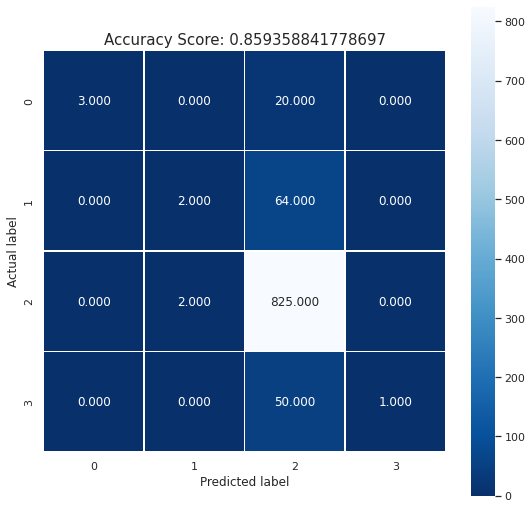

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
cm=confusion_matrix(y_test,y_predict)
score=accuracy_score(y_test, y_predict)

Accuracy Score is 0.85522


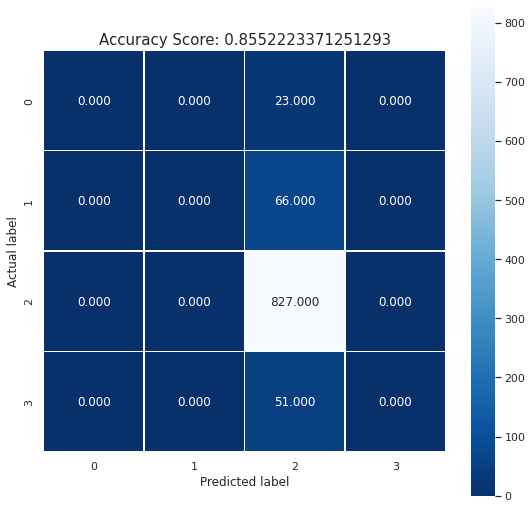

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
model = svm.SVC(C = 0.8,
                kernel='linear')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
cm=confusion_matrix(y_test,y_predict)
score=accuracy_score(y_test, y_predict)

Accuracy Score is 0.85522


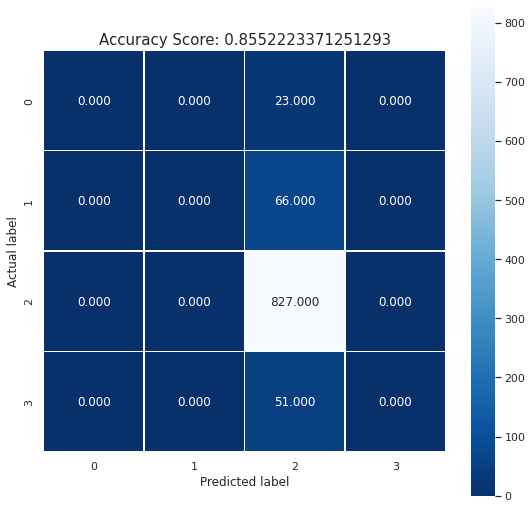

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


model = LGBMClassifier(num_leaves=31,
                       max_depth=8, 
                       learning_rate=0.02,
                       n_estimators=250,
                       subsample = 0.8,
                       colsample_bytree =0.8
                      )
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
cm=confusion_matrix(y_test,y_predict)
score=accuracy_score(y_test, y_predict)


Accuracy Score is 0.7456


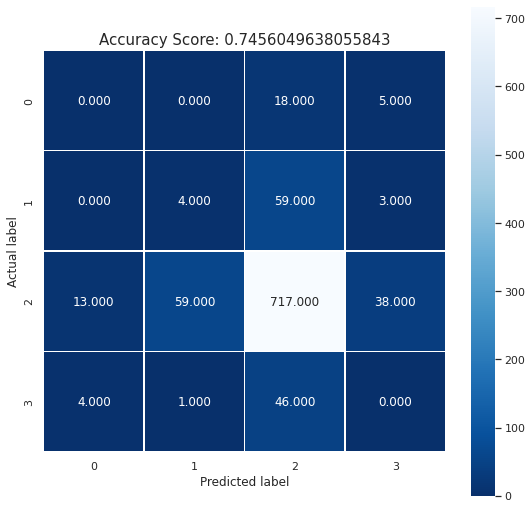

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:

model = XGBClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8, 
                      subsample=0.8, 
                      learning_rate =0.02,    
                      seed=42)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
cm=confusion_matrix(y_test,y_predict)
score=accuracy_score(y_test, y_predict)

Accuracy Score is 0.75595


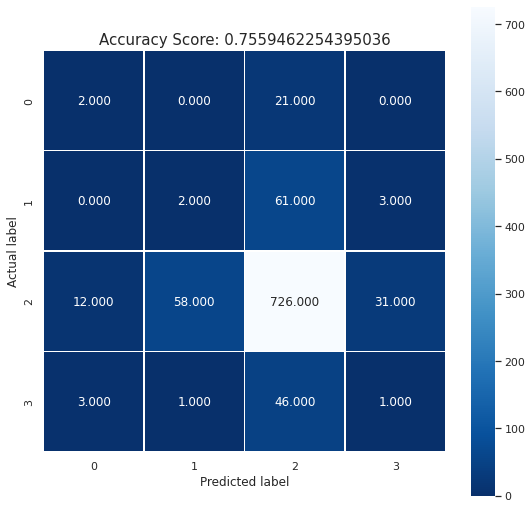

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);